In [28]:
!pip install tqdm librosa nltk pydub pandas numpy datasets matplotlib seaborn plotly==5.24.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 kB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 20.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [6]:
import os
import pandas as pd
from tqdm import tqdm

# Load your CSV file
csv_path = 'transcribed_and_reviewed.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_path)

# Define the folder where the wav files are currently located
source_folder = 'Luganda/'  # Replace with the actual folder containing all wav files

# Get the list of transcribed wav files from the CSV
transcribed_wavs = df['voice_clip'].tolist()

# Initialize counters
files_found = 0
files_not_found = 0

# Loop through the list and check if each file exists in the Luganda folder
for wav_file in tqdm(transcribed_wavs, desc="Checking files", unit="file"):
    file_path = os.path.join(source_folder, wav_file)
    
    if os.path.exists(file_path):
        files_found += 1
    else:
        files_not_found += 1

# Display the result
print(f"Files found: {files_found}")
print(f"Files not found: {files_not_found}")


Checking files: 100%|██████████| 4734/4734 [00:04<00:00, 975.01file/s] 

Files found: 4446
Files not found: 288


In [8]:
import os
import shutil
import pandas as pd
from tqdm import tqdm

# Load your CSV file
csv_path = 'transcribed_and_reviewed.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_path)

# Define the folder where the wav files are currently located
source_folder = 'Luganda/'  # Replace with the actual folder containing all wav files

# Define the folder where the found files will be saved
destination_folder = 'transcribed_wavs/'  # Replace with the folder where you want to save the found files
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get the list of transcribed wav files from the CSV
transcribed_wavs = df['voice_clip'].tolist()

# Initialize lists to store found files and their data
found_files = []
found_data = []

# Loop through the list and check if each file exists in the Luganda folder
for i, wav_file in tqdm(enumerate(transcribed_wavs), total=len(transcribed_wavs), desc="Processing files", unit="file"):
    file_path = os.path.join(source_folder, wav_file)
    
    if os.path.exists(file_path):
        found_files.append(wav_file)
        found_data.append(df.iloc[i])
        
        # Copy the file to the destination folder
        destination_file_path = os.path.join(destination_folder, wav_file)
        shutil.copy(file_path, destination_file_path)

# Create a new DataFrame with only the found files
found_df = pd.DataFrame(found_data)

# Save the new CSV with only the found files
found_csv_path = 'actual_transcribed.csv'  # Replace with your desired path
found_df.to_csv(found_csv_path, index=False)

# Display the result
print(f"Total files found and copied: {len(found_files)}")
print(f"New CSV saved to: {found_csv_path}")


Processing files: 100%|██████████| 4734/4734 [02:31<00:00, 31.32file/s]


Total files found and copied: 4446
New CSV saved to: actual_transcribed.csv


In [12]:
import plotly.io as pio
pio.renderers.default = 'notebook'


In [41]:
import plotly.express as px

# Load the dataset
csv_path = 'actual_transcribed.csv'  # Replace with your actual path
df = pd.read_csv(csv_path)
df['duration'] = df['duration'] * 3600
# 1. Summary Statistics
summary_stats = df[['duration', 'up_votes', 'down_votes']].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
          duration     up_votes   down_votes
count  4446.000000  4446.000000  4446.000000
mean     22.806118     2.512596     0.255061
std       7.562248     0.568541     0.438517
min       4.000000     1.000000     0.000000
25%      18.000000     2.000000     0.000000
50%      20.000000     3.000000     0.000000
75%      26.000000     3.000000     1.000000
max      45.000000    16.000000     2.000000


In [42]:
df.to_csv('actual_transcribed.csv', index=False)

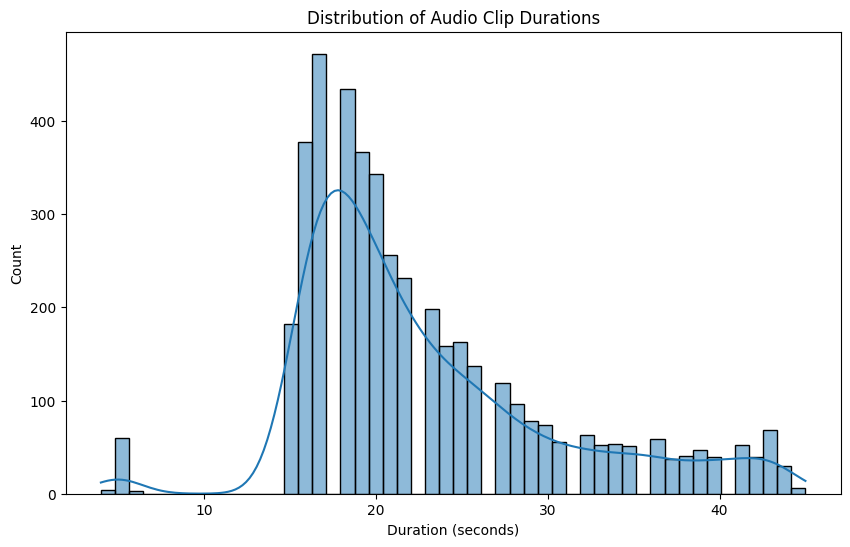

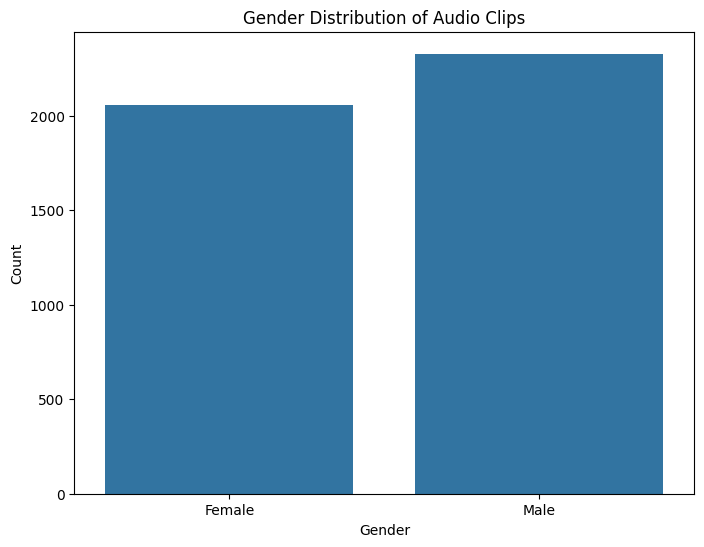

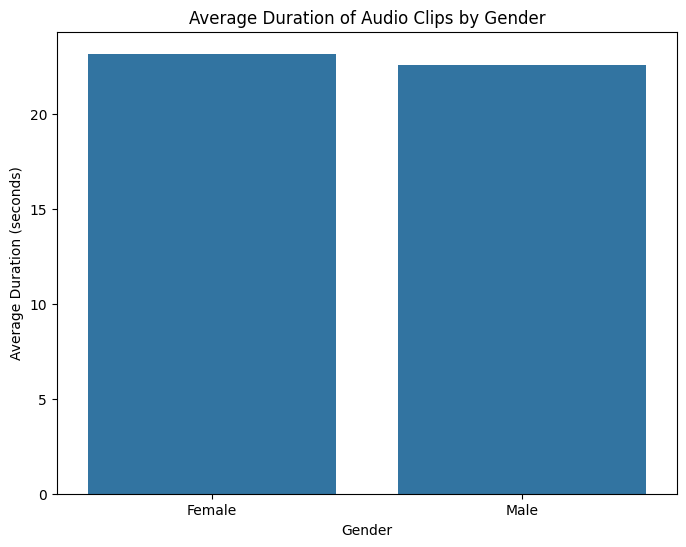

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 2. Distribution of Audio Clip Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=50, kde=True)
plt.title("Distribution of Audio Clip Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()

# 3. Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution of Audio Clips")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 4. Average Duration by Gender
plt.figure(figsize=(8, 6))
avg_duration_by_gender = df.groupby('gender')['duration'].mean().reset_index()
sns.barplot(x='gender', y='duration', data=avg_duration_by_gender)
plt.title("Average Duration of Audio Clips by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Duration (seconds)")
plt.show()

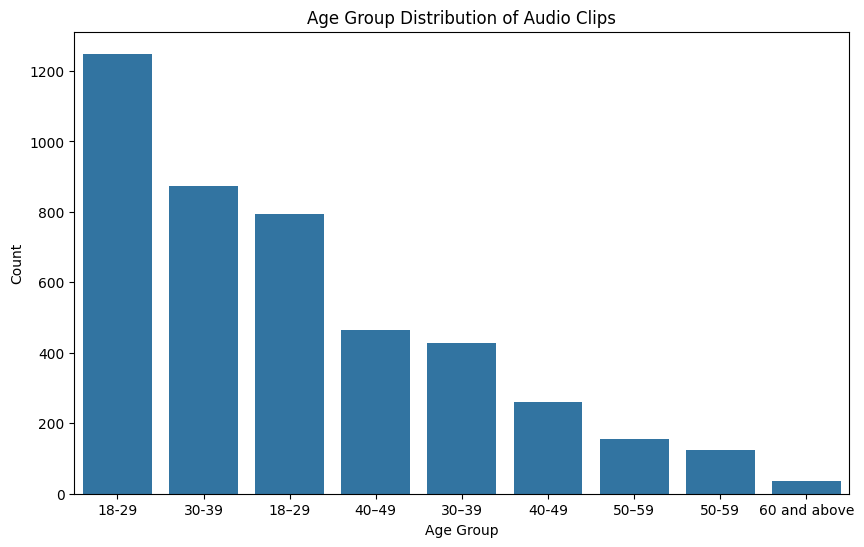

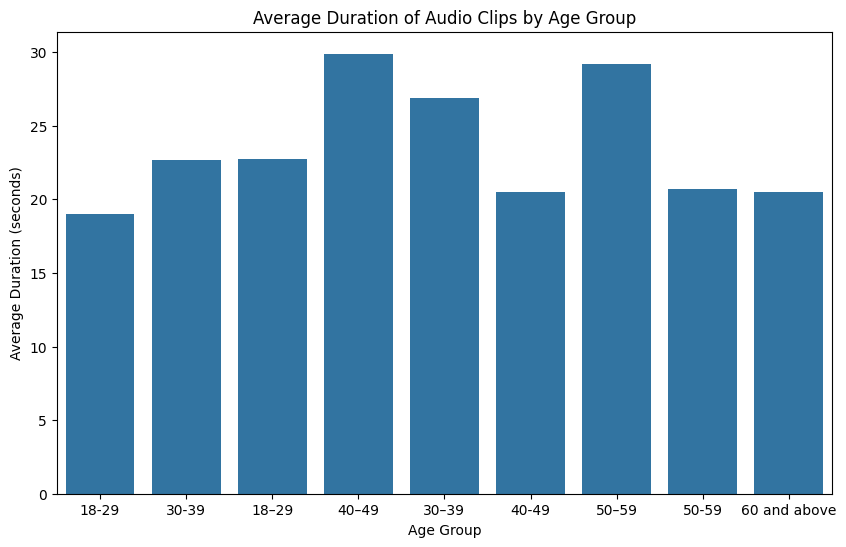

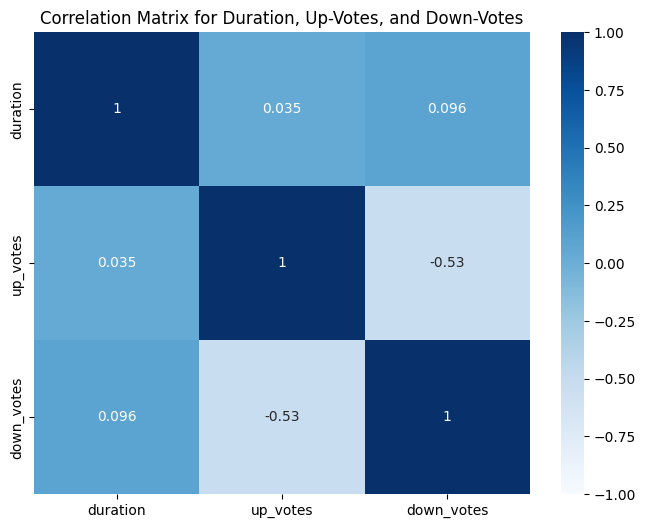

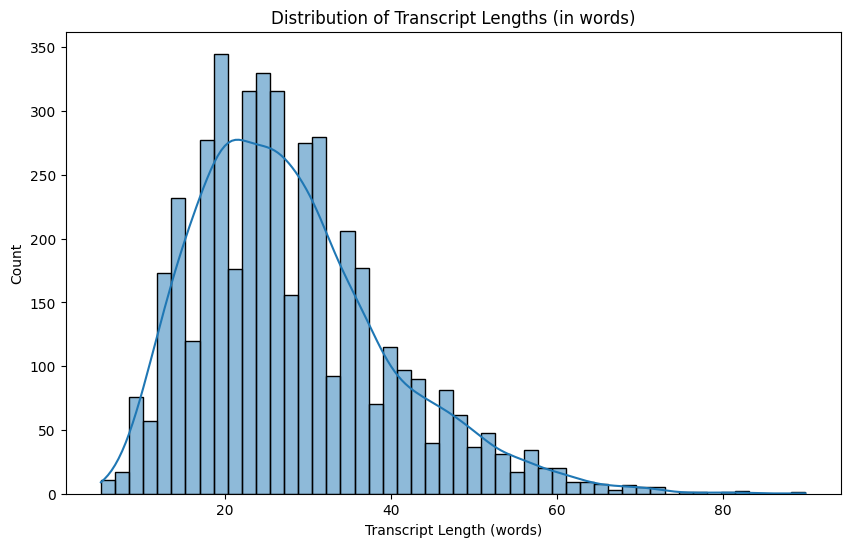

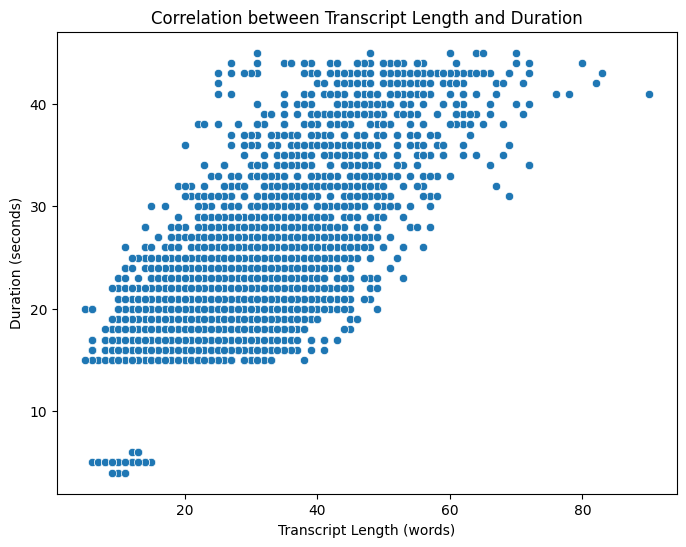

In [22]:
# 5. Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, order=df['age_group'].value_counts().index)
plt.title("Age Group Distribution of Audio Clips")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# 6. Average Duration by Age Group
plt.figure(figsize=(10, 6))
avg_duration_by_age_group = df.groupby('age_group')['duration'].mean().reset_index()
sns.barplot(x='age_group', y='duration', data=avg_duration_by_age_group, order=df['age_group'].value_counts().index)
plt.title("Average Duration of Audio Clips by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Duration (seconds)")
plt.show()

# 7. Correlation Analysis between Duration, Up-Votes, and Down-Votes
plt.figure(figsize=(8, 6))
sns.heatmap(df[['duration', 'up_votes', 'down_votes']].corr(), annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Duration, Up-Votes, and Down-Votes")
plt.show()

# 8. Transcript Length Analysis
# Calculate transcript length by counting the number of words in each transcript
df['transcript_length'] = df['transcript'].apply(lambda x: len(str(x).split()))

# Distribution of Transcript Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['transcript_length'], bins=50, kde=True)
plt.title("Distribution of Transcript Lengths (in words)")
plt.xlabel("Transcript Length (words)")
plt.ylabel("Count")
plt.show()

# 9. Correlation between Transcript Length and Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='transcript_length', y='duration', data=df)
plt.title("Correlation between Transcript Length and Duration")
plt.xlabel("Transcript Length (words)")
plt.ylabel("Duration (seconds)")
plt.show()


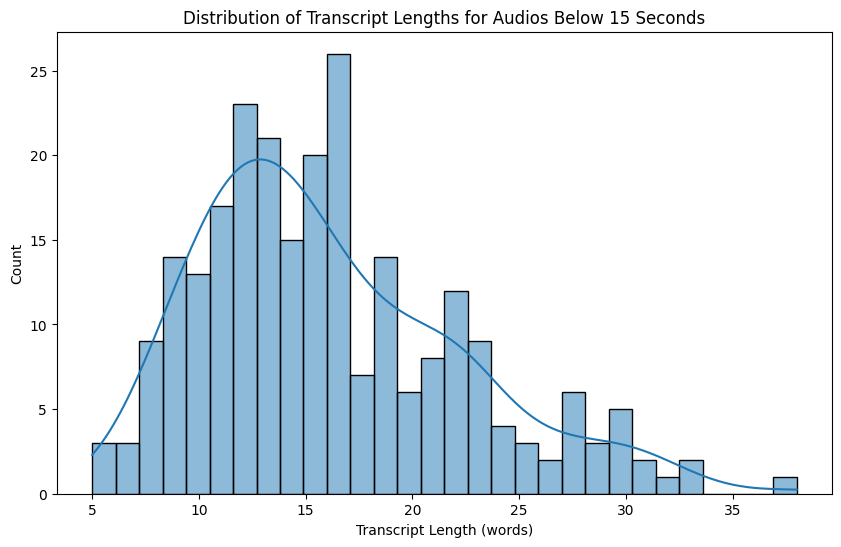

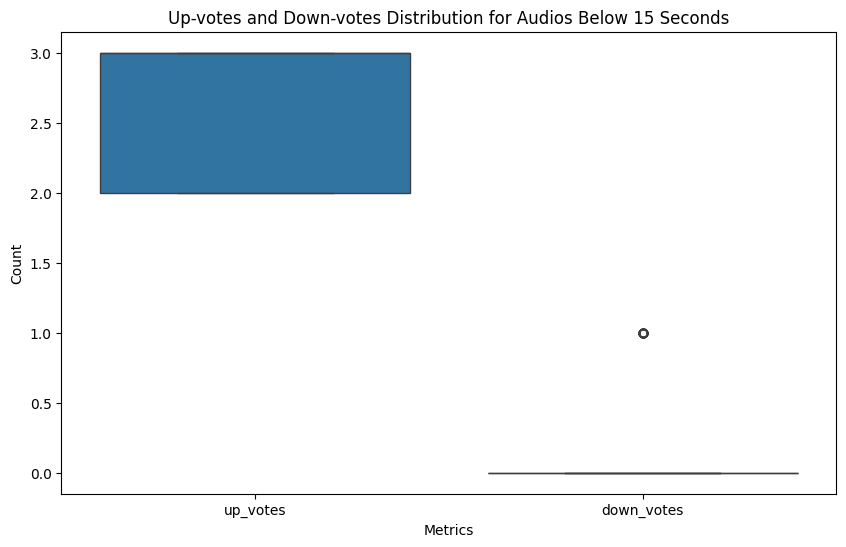

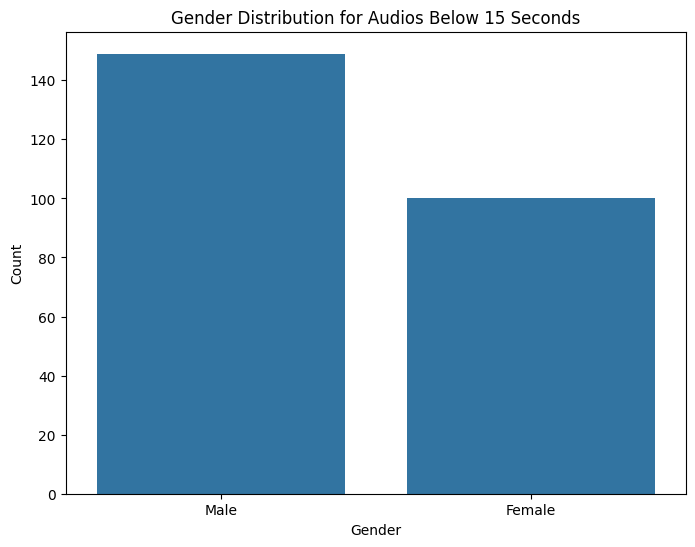

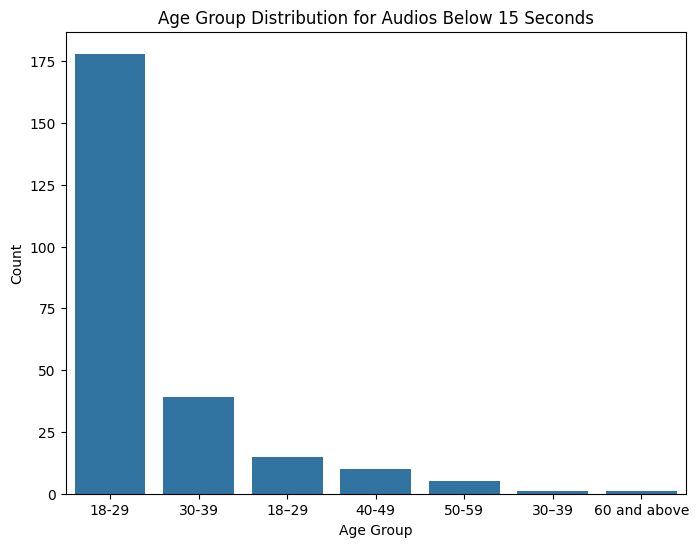

Sample Transcripts for Audios Below 15 Seconds:
                                           transcript  duration
6   Ebintu bino bikozesebwa mu buyonjo era nga bit...       4.0
7   Omwami omuvubi ayimiridde mu lyato ali mu kunn...      15.0
26  Abantu ab'enjawulo nga baliko we batudde bakut...      15.0
28  Guno mugga gutambula waliwo ku bbali emitiitit...       5.0
31  Ono nnawolovu aliko ebimyufumyufu n'ebya kirag...       5.0
45  Bino bimuli ebimuli bino birabika bulungi nnyo...      15.0
48  Bino binyonyi. Ebinyonyi bino biri bibiri era ...      15.0
50  Omusana guli mu kukya waggulu w'ennyanja enzik...      15.0
67  Mu kyalo abantu baali balima omuddo ogwali gwe...      15.0
70  Ennaku zino abantu abayiiya embugo bazikolamu ...      15.0


In [23]:
# Filter the dataset for audios with duration below 15 seconds
short_audio_df = df[df['duration'] < 15]

# 1. Distribution of Transcript Lengths for Short Audios
plt.figure(figsize=(10, 6))
sns.histplot(short_audio_df['transcript_length'], bins=30, kde=True)
plt.title("Distribution of Transcript Lengths for Audios Below 15 Seconds")
plt.xlabel("Transcript Length (words)")
plt.ylabel("Count")
plt.show()

# 2. Up-votes and Down-votes for Short Audios
plt.figure(figsize=(10, 6))
sns.boxplot(data=short_audio_df[['up_votes', 'down_votes']])
plt.title("Up-votes and Down-votes Distribution for Audios Below 15 Seconds")
plt.xlabel("Metrics")
plt.ylabel("Count")
plt.show()

# 3. Gender Distribution for Short Audios
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=short_audio_df)
plt.title("Gender Distribution for Audios Below 15 Seconds")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 4. Age Group Distribution for Short Audios
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=short_audio_df, order=short_audio_df['age_group'].value_counts().index)
plt.title("Age Group Distribution for Audios Below 15 Seconds")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# 5. Display sample transcripts for audios below 15 seconds
sample_transcripts = short_audio_df[['transcript', 'duration']].head(10)
print("Sample Transcripts for Audios Below 15 Seconds:")
print(sample_transcripts)


In [26]:
import IPython.display as ipd
import librosa
import os

# Filter the dataset for audios with duration of 5 seconds or less
very_short_audio_df = df[df['duration'] <= 15]

# Define the folder where the audio files are stored (update with your folder path)
audio_folder = 'Luganda/'  # Replace with your actual audio file folder

# Play the first 5 audio clips that are 5 seconds or less and display their transcripts
for index, row in very_short_audio_df.head(5).iterrows():
    audio_file = os.path.join(audio_folder, row['voice_clip'])
    
    if os.path.exists(audio_file):
        # Load the audio file
        audio_data, sr = librosa.load(audio_file, sr=None)
        
        # Display the transcript and audio player
        print(f"Playing audio: {row['voice_clip']} - Duration: {row['duration']} seconds")
        print(f"Transcript: {row['transcript']}")
        ipd.display(ipd.Audio(audio_data, rate=sr))
    else:
        print(f"Audio file not found: {row['voice_clip']}")


Playing audio: yogera_image_audio_20240127_022107.226341_2616.wav - Duration: 3.99999999999996 seconds
Transcript: Ebintu bino bikozesebwa mu buyonjo era nga bitudde ku mmeeza ey'embaawo.


Playing audio: yogera_image_audio_20240127_024641.904046_2651.wav - Duration: 14.99999999999976 seconds
Transcript: Omwami omuvubi ayimiridde mu lyato ali mu kunnyuka akutte engasi akuba amazzi mpola mpola ayolekera olukalu.


Playing audio: yogera_image_audio_20240127_222825.134911_2428.wav - Duration: 14.99999999999976 seconds
Transcript: Abantu ab'enjawulo nga baliko we batudde bakutte amasowaani g'emmere nga balya mu bo mulimu n'abaana.


Playing audio: yogera_image_audio_20240128_010510.020258_1627.wav - Duration: 4.99999999999968 seconds
Transcript: Guno mugga gutambula waliwo ku bbali emitiititi egya kira


Playing audio: yogera_image_audio_20240128_020327.465846_1445.wav - Duration: 4.99999999999968 seconds
Transcript: Ono nnawolovu aliko ebimyufumyufu n'ebya kiragala.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


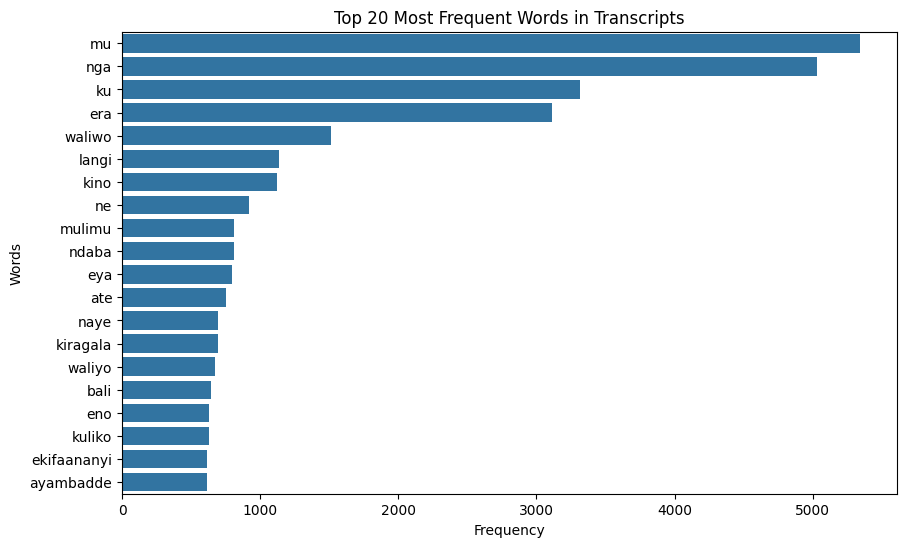

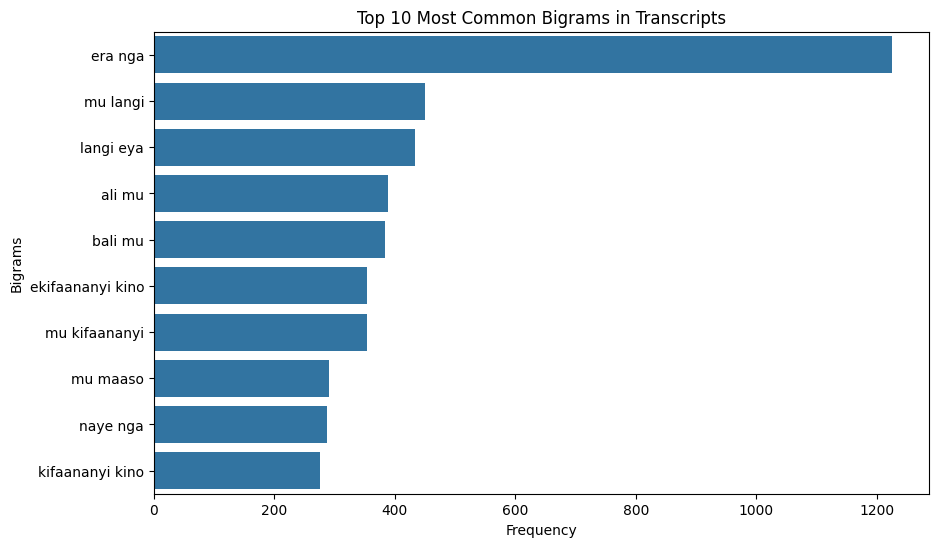

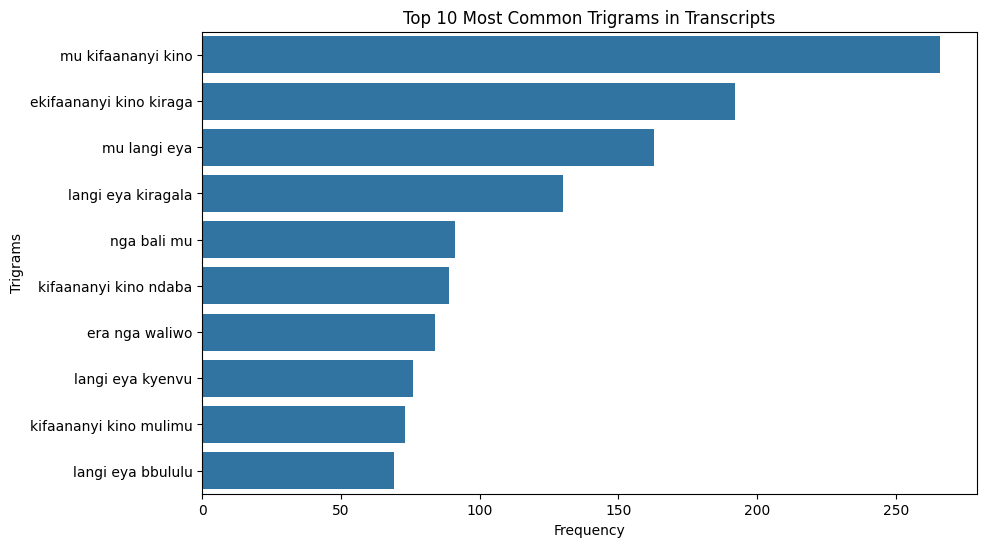

In [31]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk

# Download NLTK stopwords (if not already installed)
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
csv_path = 'actual_transcribed.csv'  # Replace with your actual path
df = pd.read_csv(csv_path)

# Combine all transcripts into a single string for analysis
all_transcripts = ' '.join(df['transcript'].dropna().astype(str).values)

# 1. Word Frequency Analysis
# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(all_transcripts.lower())
tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Get the frequency distribution of words
word_freq = Counter(tokens)

# Plot the top 20 most frequent words
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title("Top 20 Most Frequent Words in Transcripts")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# 2. N-gram Analysis (Bigrams and Trigrams)
# Generate bigrams and trigrams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Get the frequency distribution of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Plot the top 10 most common bigrams
top_bigrams = bigram_freq.most_common(10)
bigrams, bigram_counts = zip(*top_bigrams)
bigram_words = [' '.join(bigram) for bigram in bigrams]

plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_counts, y=bigram_words)
plt.title("Top 10 Most Common Bigrams in Transcripts")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

# Plot the top 10 most common trigrams
top_trigrams = trigram_freq.most_common(10)
trigrams, trigram_counts = zip(*top_trigrams)
trigram_words = [' '.join(trigram) for trigram in trigrams]

plt.figure(figsize=(10, 6))
sns.barplot(x=trigram_counts, y=trigram_words)
plt.title("Top 10 Most Common Trigrams in Transcripts")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.show()


In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [45]:
df.duration.sum()/3600

28.165555555555386

In [46]:
# Filter the dataset for audios with duration below 15 seconds
short_audios_df = df[df['duration'] < 15]

# Display the number of short audio clips and a sample
print(f"Total number of audio clips below 15 seconds: {len(short_audios_df)}")
print(short_audios_df[['voice_clip', 'duration', 'transcript']].head(10))


Total number of audio clips below 15 seconds: 249
                                           voice_clip  duration  \
6   yogera_image_audio_20240127_022107.226341_2616...       4.0   
7   yogera_image_audio_20240127_024641.904046_2651...      15.0   
26  yogera_image_audio_20240127_222825.134911_2428...      15.0   
28  yogera_image_audio_20240128_010510.020258_1627...       5.0   
31  yogera_image_audio_20240128_020327.465846_1445...       5.0   
45  yogera_image_audio_20240128_203612.469938_2952...      15.0   
48  yogera_image_audio_20240128_210835.648471_1523...      15.0   
50  yogera_image_audio_20240128_212652.753008_2583...      15.0   
67  yogera_image_audio_20230825_130142.516244_1363...      15.0   
70  yogera_image_audio_20230903_175311.517775_1904...      15.0   

                                           transcript  
6   Ebintu bino bikozesebwa mu buyonjo era nga bit...  
7   Omwami omuvubi ayimiridde mu lyato ali mu kunn...  
26  Abantu ab'enjawulo nga baliko we batudde

In [47]:
import IPython.display as ipd
import librosa
import os

# Define the folder where the audio files are stored
audio_folder = 'Luganda/'  # Replace with your actual folder path

# Play a sample of audio clips shorter than 15 seconds
for index, row in short_audios_df.head(5).iterrows():
    audio_file = os.path.join(audio_folder, row['voice_clip'])
    
    if os.path.exists(audio_file):
        # Load the audio file
        audio_data, sr = librosa.load(audio_file, sr=None)
        
        # Display the transcript and audio player
        print(f"Playing audio: {row['voice_clip']} - Duration: {row['duration']} seconds")
        print(f"Transcript: {row['transcript']}")
        ipd.display(ipd.Audio(audio_data, rate=sr))
    else:
        print(f"Audio file not found: {row['voice_clip']}")


Playing audio: yogera_image_audio_20240127_022107.226341_2616.wav - Duration: 3.99999999999996 seconds
Transcript: Ebintu bino bikozesebwa mu buyonjo era nga bitudde ku mmeeza ey'embaawo.


Playing audio: yogera_image_audio_20240127_024641.904046_2651.wav - Duration: 14.99999999999976 seconds
Transcript: Omwami omuvubi ayimiridde mu lyato ali mu kunnyuka akutte engasi akuba amazzi mpola mpola ayolekera olukalu.


Playing audio: yogera_image_audio_20240127_222825.134911_2428.wav - Duration: 14.99999999999976 seconds
Transcript: Abantu ab'enjawulo nga baliko we batudde bakutte amasowaani g'emmere nga balya mu bo mulimu n'abaana.


Playing audio: yogera_image_audio_20240128_010510.020258_1627.wav - Duration: 4.99999999999968 seconds
Transcript: Guno mugga gutambula waliwo ku bbali emitiititi egya kira


Playing audio: yogera_image_audio_20240128_020327.465846_1445.wav - Duration: 4.99999999999968 seconds
Transcript: Ono nnawolovu aliko ebimyufumyufu n'ebya kiragala.


In [48]:
import librosa.display
import numpy as np

# Function to detect silence in an audio clip
def detect_silence(audio_file, threshold=0.01):
    # Load the audio file
    audio_data, sr = librosa.load(audio_file, sr=None)
    
    # Calculate the absolute amplitude of the audio signal
    amplitude = np.abs(audio_data)
    
    # Detect silence where amplitude is below the threshold
    silence_ratio = np.mean(amplitude < threshold)
    
    return silence_ratio

# Check silence ratio for each short audio file
for index, row in short_audios_df.head(5).iterrows():
    audio_file = os.path.join(audio_folder, row['voice_clip'])
    
    if os.path.exists(audio_file):
        silence_ratio = detect_silence(audio_file)
        print(f"Audio file: {row['voice_clip']}")
        print(f"Duration: {row['duration']} seconds")
        print(f"Transcript: {row['transcript']}")
        print(f"Silence ratio: {silence_ratio * 100:.2f}%\n")
    else:
        print(f"Audio file not found: {row['voice_clip']}")


Audio file: yogera_image_audio_20240127_022107.226341_2616.wav
Duration: 3.99999999999996 seconds
Transcript: Ebintu bino bikozesebwa mu buyonjo era nga bitudde ku mmeeza ey'embaawo.
Silence ratio: 45.89%

Audio file: yogera_image_audio_20240127_024641.904046_2651.wav
Duration: 14.99999999999976 seconds
Transcript: Omwami omuvubi ayimiridde mu lyato ali mu kunnyuka akutte engasi akuba amazzi mpola mpola ayolekera olukalu.
Silence ratio: 55.77%

Audio file: yogera_image_audio_20240127_222825.134911_2428.wav
Duration: 14.99999999999976 seconds
Transcript: Abantu ab'enjawulo nga baliko we batudde bakutte amasowaani g'emmere nga balya mu bo mulimu n'abaana.
Silence ratio: 67.91%

Audio file: yogera_image_audio_20240128_010510.020258_1627.wav
Duration: 4.99999999999968 seconds
Transcript: Guno mugga gutambula waliwo ku bbali emitiititi egya kira
Silence ratio: 65.99%

Audio file: yogera_image_audio_20240128_020327.465846_1445.wav
Duration: 4.99999999999968 seconds
Transcript: Ono nnawolovu 

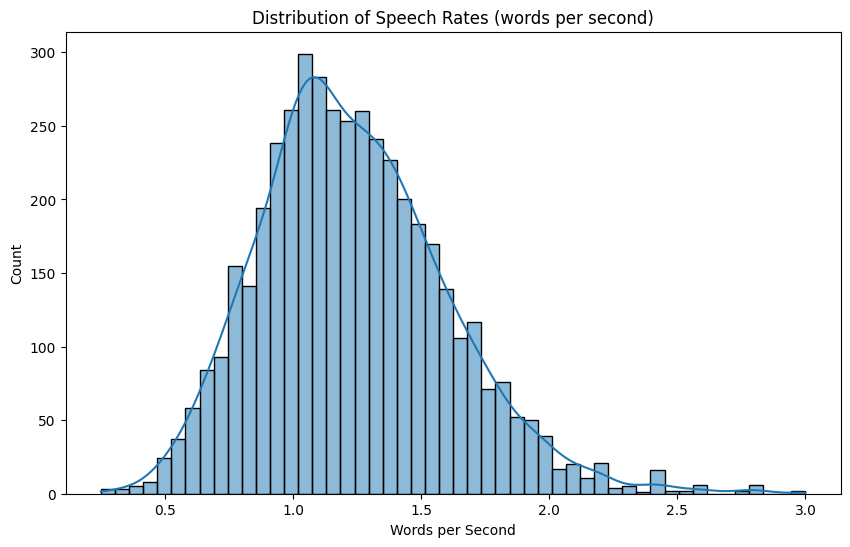

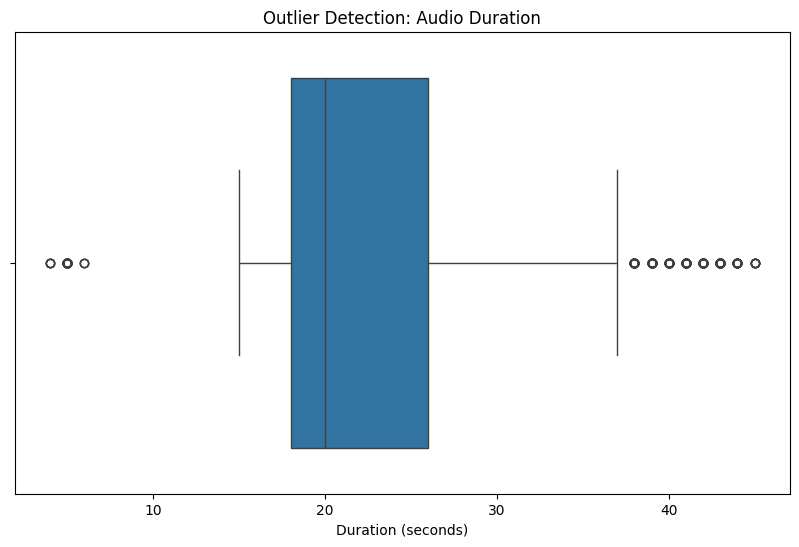

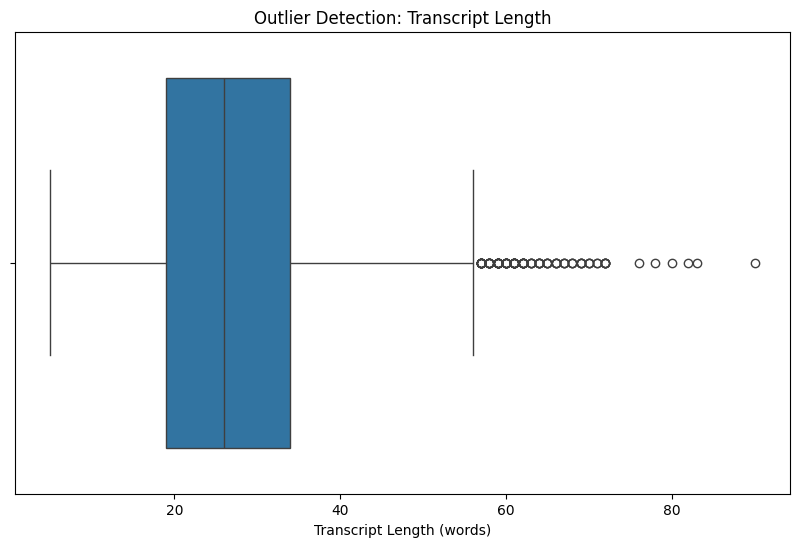

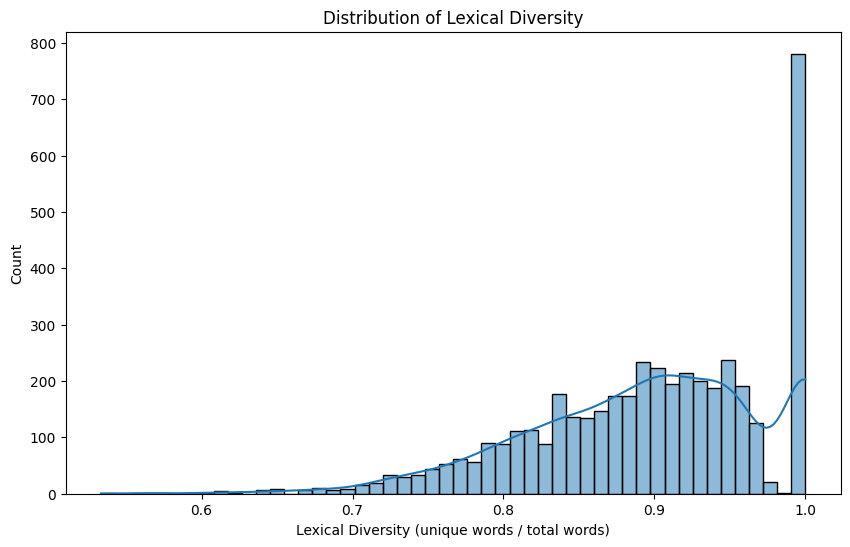

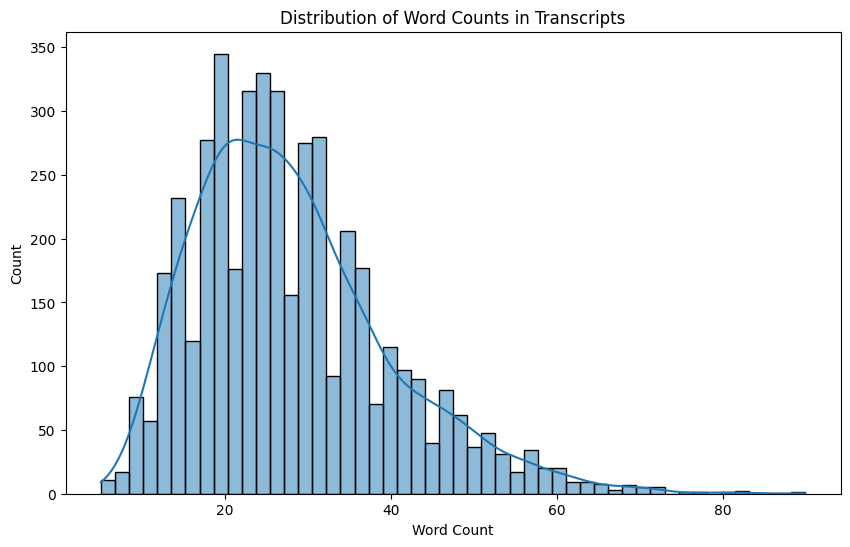

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
csv_path = 'actual_transcribed.csv'  # Replace with your actual path
df = pd.read_csv(csv_path)

# Calculate transcript length (number of words in each transcript)
df['transcript_length'] = df['transcript'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# 1. Speech Rate Analysis (words per second)
df['speech_rate'] = df['transcript_length'] / df['duration']

# Plot the distribution of speech rates
plt.figure(figsize=(10, 6))
sns.histplot(df['speech_rate'], bins=50, kde=True)
plt.title("Distribution of Speech Rates (words per second)")
plt.xlabel("Words per Second")
plt.ylabel("Count")
plt.show()

# 2. Outlier Detection: Audio Duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration'])
plt.title("Outlier Detection: Audio Duration")
plt.xlabel("Duration (seconds)")
plt.show()

# 3. Outlier Detection: Transcript Length
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['transcript_length'])
plt.title("Outlier Detection: Transcript Length")
plt.xlabel("Transcript Length (words)")
plt.show()

# 4. Lexical Diversity (unique words / total words)
df['lexical_diversity'] = df['transcript'].apply(lambda x: len(set(str(x).split())) / len(str(x).split()) if len(str(x).split()) > 0 else 0)

# Plot the distribution of lexical diversity
plt.figure(figsize=(10, 6))
sns.histplot(df['lexical_diversity'], bins=50, kde=True)
plt.title("Distribution of Lexical Diversity")
plt.xlabel("Lexical Diversity (unique words / total words)")
plt.ylabel("Count")
plt.show()

# 5. Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['transcript_length'], bins=50, kde=True)
plt.title("Distribution of Word Counts in Transcripts")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.show()


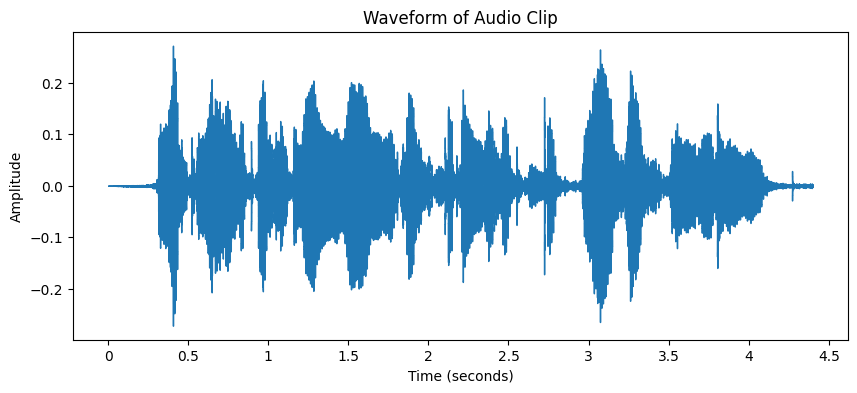

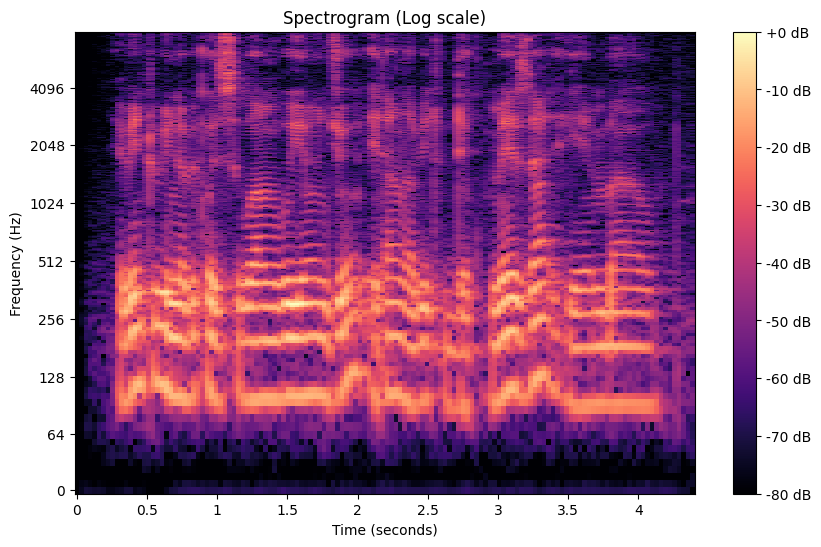

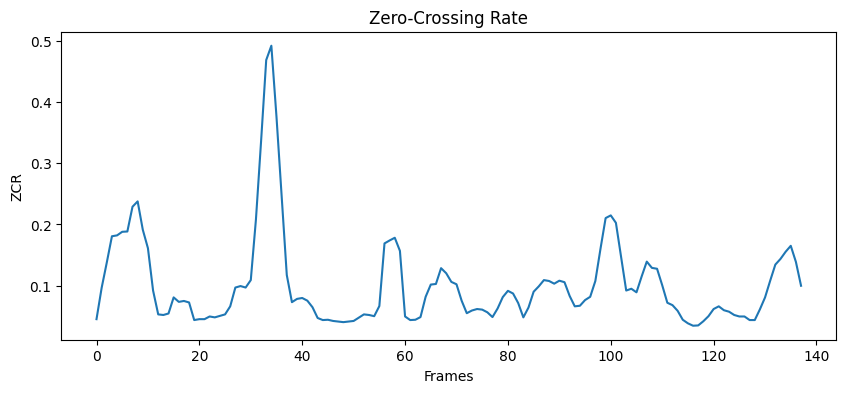

In [55]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the folder where the audio files are stored
audio_folder = 'transcribed_wavs/'  # Replace with your actual audio folder path

# Load a sample audio file
audio_file = os.path.join(audio_folder, 'yogera_image_audio_20240127_022107.226341_2616.wav')  # Replace with any audio file in your dataset
audio_data, sr = librosa.load(audio_file, sr=None)

# 1. Waveform Analysis
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_data, sr=sr)
plt.title('Waveform of Audio Clip')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# 2. Spectrogram Analysis
plt.figure(figsize=(10, 6))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log scale)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

# 3. Zero-Crossing Rate (ZCR)
zcr = librosa.feature.zero_crossing_rate(audio_data)[0]
plt.figure(figsize=(10, 4))
plt.plot(zcr)
plt.title('Zero-Crossing Rate')
plt.xlabel('Frames')
plt.ylabel('ZCR')
plt.show()
